In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from numpy import corrcoef
import operator
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif

In [2]:
df = pd.read_csv('kidney_disease.csv', index_col = 'id')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df = df.dropna()

In [4]:
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = LabelEncoder().fit_transform(df[col])

In [5]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11,42,14,1,0,0,1,1,1,0
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,8,11,12,1,1,0,1,0,1,0
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,11,25,13,1,1,0,1,1,0,0
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,0,8,2,1,1,1,1,1,0,0
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,4,63,7,1,1,1,1,1,1,0


In [6]:
x = df.drop( ["classification"], axis = 1)
y = df["classification"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [8]:
pearsoncorr = x_train.corr(method='pearson')
pearsoncorr

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
age,1.000000,0.086029,-0.263481,0.282077,0.167882,-0.137052,-0.202424,0.184373,0.070594,0.290064,...,-0.241297,-0.221146,-0.160204,-0.221344,0.359436,0.288299,0.262468,0.159038,0.169738,0.167853
bp,0.086029,1.000000,-0.187209,0.294379,0.263182,-0.287401,-0.122146,0.178754,0.084820,0.205739,...,-0.251275,-0.296591,-0.001098,-0.221630,0.342632,0.187978,0.314763,0.124239,0.092710,0.304650
sg,-0.263481,-0.187209,1.000000,-0.739209,-0.432233,0.559263,0.667457,-0.507562,-0.506642,-0.554002,...,0.680558,0.620871,0.328848,0.624144,-0.642311,-0.601489,-0.364874,-0.565508,-0.604652,-0.459928
al,0.282077,0.294379,-0.739209,1.000000,0.490813,-0.505161,-0.710600,0.462627,0.439350,0.529351,...,-0.783697,-0.703691,-0.288954,-0.648231,0.822217,0.691622,0.355395,0.626944,0.624548,0.587783
su,0.167882,0.263182,-0.432233,0.490813,1.000000,-0.283900,-0.249410,0.183518,0.365789,0.767736,...,-0.371991,-0.369381,-0.142197,-0.361779,0.549002,0.578577,0.375252,0.239173,0.253404,0.237432
rbc,-0.137052,-0.287401,0.559263,-0.505161,-0.283900,1.000000,0.541039,-0.183521,-0.306294,-0.518756,...,0.450326,0.457153,0.204697,0.386163,-0.451937,-0.493197,-0.373838,-0.375035,-0.318919,-0.181956
pc,-0.202424,-0.122146,0.667457,-0.710600,-0.249410,0.541039,1.000000,-0.521847,-0.394652,-0.459878,...,0.720743,0.632870,0.193914,0.653981,-0.659310,-0.635764,-0.359494,-0.578061,-0.605595,-0.569138
pcc,0.184373,0.178754,-0.507562,0.462627,0.183518,-0.183521,-0.521847,1.000000,0.306917,0.329167,...,-0.482313,-0.344910,-0.170360,-0.474449,0.444750,0.289414,0.401709,0.449553,0.373838,0.490290
ba,0.070594,0.084820,-0.506642,0.439350,0.365789,-0.306294,-0.394652,0.306917,1.000000,0.351137,...,-0.313942,-0.325139,-0.177519,-0.275376,0.252260,0.320222,0.306917,0.193954,0.306294,0.115072
bgr,0.290064,0.205739,-0.554002,0.529351,0.767736,-0.518756,-0.459878,0.329167,0.351137,1.000000,...,-0.462415,-0.471270,-0.226956,-0.444168,0.628846,0.700180,0.463797,0.338066,0.326690,0.182802


<AxesSubplot:>

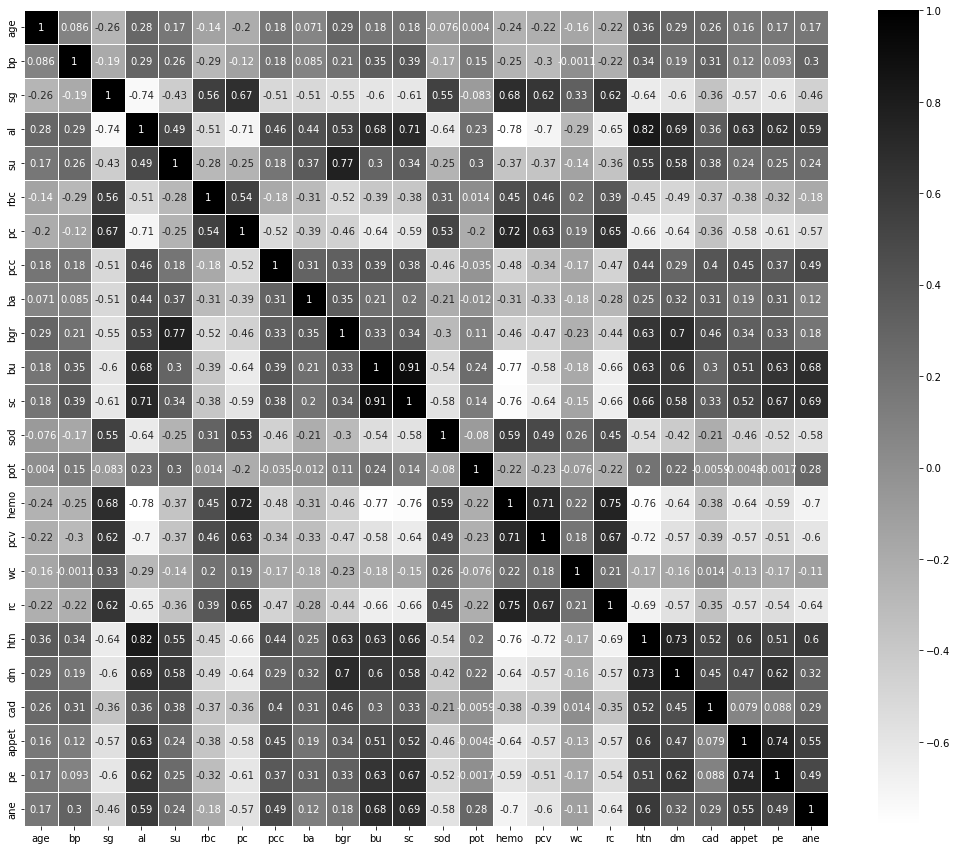

In [9]:
plt.figure(figsize = (18,15))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='binary',
            annot=True,
            linewidth=0.5)

In [10]:
#Selecting highly correlated features using Pearsons Correlation
def correlation(threshold):
    col_corr = set()
    corr_matrix = pearsoncorr
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > threshold):
            #if (corr_matrix.iloc[i, j] > threshold):
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [11]:
#select features with 75% threshold
corr_features = correlation(0.75)
corr_features

{'bgr', 'htn', 'sc'}

In [12]:
#Correlation matrix and upper triangular matrix
cm = pearsoncorr.abs()
ut = cm.where(np.triu(np.ones(cm.shape),k=1).astype(bool))
todrop = {column for column in ut.columns if any(ut[column] > 0.75)}
todrop

{'bgr', 'hemo', 'htn', 'sc'}

In [13]:
#Features that appear through both algorithms
todrop = {i for i in todrop.intersection(corr_features)}
todrop

{'bgr', 'htn', 'sc'}

In [14]:
#MRMr implementation

class MRMR:
    def __init__(self, df, target_name, difference_or_quotient='difference'):
        self.df = df
        self.idxs_by_class = [df[df[target_name] == v].index for v in df[target_name].unique()]
        self.features = [col for col in df.columns if col != target_name]
        self.ranked_features = []
        self.feature_relevance = {feat_name: self.calc_feature_relevance(self.df[feat_name]) for feat_name in
                                  self.features}
        self.use_difference = difference_or_quotient == 'difference'
        self.calculated_correlations = {}

    def calc_feature_relevance(self, feature):
        groups = [feature[class_idxs].values for class_idxs in self.idxs_by_class]
        return f_oneway(*groups).statistic

    def calc_feature_redundancy(self, feature):
        redundancy = 0
        for feat in self.ranked_features:
            if (feat, feature) not in self.calculated_correlations:
                self.calculated_correlations[(feat, feature)] = abs(corrcoef(self.df[feature], self.df[feat])[1, 0])
                self.calculated_correlations[(feature, feat)] = abs(corrcoef(self.df[feature], self.df[feat])[1, 0])

            redundancy += self.calculated_correlations[(feat, feature)]
        return redundancy

    def rank_features(self):
        most_important_feature = max(self.feature_relevance.items(), key=operator.itemgetter(1))[0]
        self.ranked_features.append(most_important_feature)

        while len(self.ranked_features) != len(self.features):
            top_importance = 0
            most_important_feature = None
            for feat in self.features:
                if feat in self.ranked_features:
                    continue

                feature_redundancy = self.calc_feature_redundancy(feat)
                feature_relevance = self.feature_relevance[feat]
                if self.use_difference:
                    importance = feature_relevance - feature_redundancy
                else:
                    importance = feature_relevance / feature_redundancy

                if importance > top_importance:
                    top_importance = importance
                    most_important_feature = feat

            self.ranked_features.append(most_important_feature)

        return self.ranked_features

In [15]:
different_ranking_methods = {}

In [16]:
f_scores = f_classif(x, y)[0]
f_scores = pd.Series(f_scores, index=[col for col in df.columns if col!='classification']).sort_values(ascending=False)
different_ranking_methods['anova_f_statistic'] = f_scores.index

In [17]:
mrmr = MRMR(df, 'classification')
different_ranking_methods['mrmr_difference_based'] = mrmr.rank_features()

In [18]:
mrmr = MRMR(df, 'classification', difference_or_quotient='quotient')
different_ranking_methods['mrmr_quotient_based'] = mrmr.rank_features()

In [19]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
rfc_features = pd.Series(model.feature_importances_, index=mrmr.features).sort_values(ascending=False)
different_ranking_methods['random_forest_feature_ranking'] = rfc_features.index

In [20]:
pd.DataFrame(different_ranking_methods)

,anova_f_statistic,mrmr_difference_based,mrmr_quotient_based,random_forest_feature_ranking
0,al,al,al,al
1,htn,htn,htn,sc
2,hemo,hemo,hemo,hemo
3,pcv,pcv,sg,pcv
4,sg,sg,pcv,rc
5,pc,pc,pc,bu
6,dm,dm,dm,sg
7,rc,rc,rc,htn
8,sc,sc,sc,dm
9,bu,bu,bu,pc


In [36]:
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=x, y=y, K=10)
selected_features = set(selected_features)
selected_features

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 138.01it/s]


{'al', 'bu', 'dm', 'hemo', 'htn', 'pc', 'pcv', 'rc', 'sc', 'sg'}

In [22]:
#https://github.com/smazzanti/mrmr
#https://elliot-weissberg.medium.com/another-feature-selection-algorithm-mrmr-3827b6b19e33

Weight for the classification accuracy [0-1]: .75
Enter the percentage of data wanted for valdiation [0, 100]: 20

                          Iteration - 1


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9036458333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 2 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 3 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 4 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 5 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 6 - Fitness: 0.8359375, Number of Features: 9
Particle 7 - Fitness: 0.8359375, Number of Features: 9
Particle 8 - Fitness: 0.8359375, Number of Features: 9
Particle 9 - Fitness: 0.8359375, Number of Features: 9
Particle 10 - Fitness: 0.828125, Number of Features: 12
Particle 11 - Fitness: 0.828125, Number of Features: 12
Particle 12 - Fitness: 0.82552083


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9036458333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 2 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 3 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 4 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 5 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 6 - Fitness: 0.8671875, Number of Features: 6
Particle 7 - Fitness: 0.859375, Number of Features: 9
Particle 8 - Fitness: 0.8567708333333334, Number of Features: 7
Particle 9 - Fitness: 0.8567708333333334, Number of Features: 7
Particle 10 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 11 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 12 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 13 - Fitness: 0.8359375, Number of Features: 9
Particle 14 - Fitness: 0.830729166


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8932291666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 2 - Fitness: 0.890625, Number of Features: 6
Particle 3 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 4 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 5 - Fitness: 0.859375, Number of Features: 9
Particle 6 - Fitness: 0.8567708333333334, Number of Features: 7
Particle 7 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 8 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 9 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 10 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 11 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 12 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 13 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 14 - Fitness: 


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8932291666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 2 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 3 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 4 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 5 - Fitness: 0.859375, Number of Features: 9
Particle 6 - Fitness: 0.8515625, Number of Features: 12
Particle 7 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 8 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 9 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 10 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 11 - Fitness: 0.8359375, Number of Features: 9
Particle 12 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 13 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 14 - Fitness: 0.82


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.90625
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.90625, Number of Features: 9
Particle 2 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 3 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 4 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 5 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 6 - Fitness: 0.859375, Number of Features: 9
Particle 7 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 8 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 9 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 10 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 11 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 12 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 13 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 14 - Fitness: 0.799479


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9036458333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 2 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 3 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 4 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 5 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 6 - Fitness: 0.8567708333333334, Number of Features: 7
Particle 7 - Fitness: 0.8515625, Number of Features: 12
Particle 8 - Fitness: 0.84375, Number of Features: 6
Particle 9 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 10 - Fitness: 0.828125, Number of Features: 12
Particle 11 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 12 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 13 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 14 - Fitness: 0.80208


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9140625
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.9140625, Number of Features: 6
Particle 2 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 3 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 4 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 5 - Fitness: 0.8359375, Number of Features: 9
Particle 6 - Fitness: 0.828125, Number of Features: 12
Particle 7 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 8 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 9 - Fitness: 0.8046875, Number of Features: 12
Particle 10 - Fitness: 0.7994791666666666, Number of Features: 8
Particle 11 - Fitness: 0.796875, Number of Features: 15
Particle 12 - Fitness: 0.7942708333333334, Number of Features: 13
Particle 13 - Fitness: 0.7942708333333334, Number of Features: 13
Particle 14 - Fitness: 0.7916666666666666, Number of Fea


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9114583333333334
Number of Features: 4
----------------------------------------

Particle 1 - Fitness: 0.9114583333333334, Number of Features: 4
Particle 2 - Fitness: 0.8828125, Number of Features: 9
Particle 3 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 4 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 5 - Fitness: 0.828125, Number of Features: 12
Particle 6 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 7 - Fitness: 0.8203125, Number of Features: 6
Particle 8 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 9 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 10 - Fitness: 0.8046875, Number of Features: 12
Particle 11 - Fitness: 0.8046875, Number of Features: 12
Particle 12 - Fitness: 0.8046875, Number of Features: 12
Particle 13 - Fitness: 0.8046875, Number of Features: 12
Particle 14 - Fitness: 0.7994791666666666, Number of Features: 


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8723958333333334
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 2 - Fitness: 0.8567708333333334, Number of Features: 7
Particle 3 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 4 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 5 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 6 - Fitness: 0.828125, Number of Features: 12
Particle 7 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 8 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 9 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 10 - Fitness: 0.8125, Number of Features: 9
Particle 11 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 12 - Fitness: 0.8020833333333334, Number of Features: 10
Particle 13 - Fitness: 0.7942708333333334, Number of Features: 13
Particle 14 - Fitne


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8932291666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 2 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 3 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 4 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 5 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 6 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 7 - Fitness: 0.8359375, Number of Features: 9
Particle 8 - Fitness: 0.8359375, Number of Features: 9
Particle 9 - Fitness: 0.8229166666666666, Number of Features: 8
Particle 10 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 11 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 12 - Fitness: 0.8046875, Number of Features: 12
Particle 13 - Fitness: 0.8046875, Number of Features: 12
Particle 14 - Fitness: 0.8046875, Num


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.890625
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.890625, Number of Features: 6
Particle 2 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 3 - Fitness: 0.859375, Number of Features: 9
Particle 4 - Fitness: 0.859375, Number of Features: 9
Particle 5 - Fitness: 0.8567708333333334, Number of Features: 7
Particle 6 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 7 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 8 - Fitness: 0.8359375, Number of Features: 9
Particle 9 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 10 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 11 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 12 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 13 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 14 - Fitness: 0.8046875, Number of Featur


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.875
Number of Features: 12
----------------------------------------

Particle 1 - Fitness: 0.875, Number of Features: 12
Particle 2 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 3 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 4 - Fitness: 0.859375, Number of Features: 9
Particle 5 - Fitness: 0.8515625, Number of Features: 12
Particle 6 - Fitness: 0.8515625, Number of Features: 12
Particle 7 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 8 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 9 - Fitness: 0.828125, Number of Features: 12
Particle 10 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 11 - Fitness: 0.8203125, Number of Features: 6
Particle 12 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 13 - Fitness: 0.8046875, Number of Features: 12
Particle 14 - Fitness: 0.8046875, Number of Features: 12
Particle 15 - Fitness:


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9166666666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 2 - Fitness: 0.8567708333333334, Number of Features: 7
Particle 3 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 4 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 5 - Fitness: 0.8359375, Number of Features: 9
Particle 6 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 7 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 8 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 9 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 10 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 11 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 12 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 13 - Fitness: 0.8151041666666666, Number of Features: 11
Particle


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8619791666666666
Number of Features: 11
----------------------------------------

Particle 1 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 2 - Fitness: 0.8567708333333334, Number of Features: 7
Particle 3 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 4 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 5 - Fitness: 0.8359375, Number of Features: 9
Particle 6 - Fitness: 0.8359375, Number of Features: 9
Particle 7 - Fitness: 0.828125, Number of Features: 12
Particle 8 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 9 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 10 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 11 - Fitness: 0.8046875, Number of Features: 12
Particle 12 - Fitness: 0.8046875, Number of Features: 12
Particle 13 - Fitness: 0.8046875, Number of Features: 12
Particle 14 - Fitness: 0.8046875, Number of Features


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8932291666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 2 - Fitness: 0.859375, Number of Features: 9
Particle 3 - Fitness: 0.859375, Number of Features: 9
Particle 4 - Fitness: 0.8567708333333334, Number of Features: 7
Particle 5 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 6 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 7 - Fitness: 0.8359375, Number of Features: 9
Particle 8 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 9 - Fitness: 0.828125, Number of Features: 12
Particle 10 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 11 - Fitness: 0.8229166666666666, Number of Features: 8
Particle 12 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 13 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 14 - Fitness: 0.807291666666666


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.90625
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.90625, Number of Features: 9
Particle 2 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 3 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 4 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 5 - Fitness: 0.8515625, Number of Features: 12
Particle 6 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 7 - Fitness: 0.8359375, Number of Features: 9
Particle 8 - Fitness: 0.8359375, Number of Features: 9
Particle 9 - Fitness: 0.828125, Number of Features: 12
Particle 10 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 11 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 12 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 13 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 14 - Fitness: 0.8046875, Number of Features: 12
Par


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8828125
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.8828125, Number of Features: 9
Particle 2 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 3 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 4 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 5 - Fitness: 0.8359375, Number of Features: 9
Particle 6 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 7 - Fitness: 0.828125, Number of Features: 12
Particle 8 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 9 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 10 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 11 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 12 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 13 - Fitness: 0.8046875, Number of Features: 12
Particle 14 - Fitness: 0.8046875, Number of F


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8802083333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 2 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 3 - Fitness: 0.8359375, Number of Features: 9
Particle 4 - Fitness: 0.8333333333333334, Number of Features: 7
Particle 5 - Fitness: 0.828125, Number of Features: 12
Particle 6 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 7 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 8 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 9 - Fitness: 0.8229166666666666, Number of Features: 8
Particle 10 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 11 - Fitness: 0.8125, Number of Features: 9
Particle 12 - Fitness: 0.8046875, Number of Features: 12
Particle 13 - Fitness: 0.8020833333333334, Number of Features: 10
Particle 14 - Fitness: 0.796875, Number o


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9375
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.9375, Number of Features: 6
Particle 2 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 3 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 4 - Fitness: 0.8359375, Number of Features: 9
Particle 5 - Fitness: 0.8359375, Number of Features: 9
Particle 6 - Fitness: 0.828125, Number of Features: 12
Particle 7 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 8 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 9 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 10 - Fitness: 0.8125, Number of Features: 9
Particle 11 - Fitness: 0.8046875, Number of Features: 12
Particle 12 - Fitness: 0.8046875, Number of Features: 12
Particle 13 - Fitness: 0.8046875, Number of Features: 12
Particle 14 - Fitness: 0.8046875, Number of Features: 12
Particle 15 - Fitness: 0.8020833333


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9479166666666666
Number of Features: 5
----------------------------------------

Particle 1 - Fitness: 0.9479166666666666, Number of Features: 5
Particle 2 - Fitness: 0.859375, Number of Features: 9
Particle 3 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 4 - Fitness: 0.84375, Number of Features: 15
Particle 5 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 6 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 7 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 8 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 9 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 10 - Fitness: 0.8125, Number of Features: 9
Particle 11 - Fitness: 0.8046875, Number of Features: 12
Particle 12 - Fitness: 0.8046875, Number of Features: 12
Particle 13 - Fitness: 0.7942708333333334, Number of Features: 13
Particle 14 - Fitness: 0.7890625, Number of Featur


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9036458333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 2 - Fitness: 0.8671875, Number of Features: 6
Particle 3 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 4 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 5 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 6 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 7 - Fitness: 0.8359375, Number of Features: 9
Particle 8 - Fitness: 0.8229166666666666, Number of Features: 8
Particle 9 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 10 - Fitness: 0.8046875, Number of Features: 12
Particle 11 - Fitness: 0.8046875, Number of Features: 12
Particle 12 - Fitness: 0.8046875, Number of Features: 12
Particle 13 - Fitness: 0.8020833333333334, Number of Features: 10
Particle 14 - Fitness: 0.7994791666666666, N


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8932291666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 2 - Fitness: 0.8828125, Number of Features: 9
Particle 3 - Fitness: 0.8671875, Number of Features: 6
Particle 4 - Fitness: 0.859375, Number of Features: 9
Particle 5 - Fitness: 0.8515625, Number of Features: 12
Particle 6 - Fitness: 0.8359375, Number of Features: 9
Particle 7 - Fitness: 0.8333333333333334, Number of Features: 7
Particle 8 - Fitness: 0.828125, Number of Features: 12
Particle 9 - Fitness: 0.8229166666666666, Number of Features: 8
Particle 10 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 11 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 12 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 13 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 14 - Fitness: 0.8151041666666666, Number of Featu

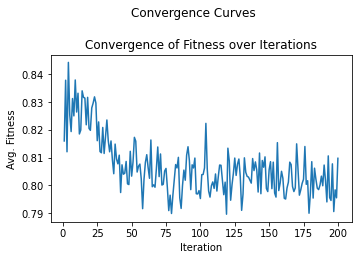

In [23]:
from Py_FS.wrapper.nature_inspired.PSO import PSO as pso
solution = pso(num_agents=30, max_iter=200, train_data=x, train_label=y, save_conv_graph=True)

In [24]:
solution.best_agent

array([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1.])

In [25]:
pso_feature = []
for i,v in enumerate(solution.best_agent):
    if v == 1:
        pso_feature.append(x.columns[i])
pso_feature = set(pso_feature)
pso_feature

{'ane', 'appet', 'pc', 'sg'}

In [26]:
solution.final_fitness

array([0.89322917, 0.8828125 , 0.8671875 , 0.859375  , 0.8515625 ,
       0.8359375 , 0.83333333, 0.828125  , 0.82291667, 0.81770833,
       0.81770833, 0.81510417, 0.81510417, 0.81510417, 0.80729167,
       0.8046875 , 0.79427083, 0.79427083, 0.79427083, 0.79427083,
       0.79427083, 0.79166667, 0.79166667, 0.79166667, 0.78385417,
       0.7734375 , 0.77083333, 0.76822917, 0.75260417, 0.72916667])

In [27]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(x_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_feature = set(rfe_feature)

Fitting estimator with 24 features.
Fitting estimator with 14 features.
10 selected features


In [28]:
rfe_feature

{'al', 'bgr', 'bu', 'dm', 'hemo', 'pc', 'pcv', 'rc', 'sc', 'sod'}

In [29]:
#From MRMr
selected_features

['al', 'htn', 'hemo', 'sg', 'pcv', 'pc', 'dm', 'rc', 'sc', 'bu']

In [30]:
pso_feature

{'ane', 'appet', 'pc', 'sg'}

In [37]:
#filter common features obtained through pso, rfe, mrmr using pearson
#mrmr and rfe selected top 10 features so find common and union with pso best features
(rfe_feature.intersection((selected_features).union(pso_feature)).difference(todrop))

{'al', 'bu', 'dm', 'hemo', 'pc', 'pcv', 'rc'}